In [1]:
import pandas as pd 
import numpy as np

In [2]:
vacc = pd.read_csv(r'D:\IMARTICUS\h1n1_vaccine_prediction.csv')

In [3]:
vacc.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
vacc.shape

(26707, 34)

In [5]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
vacc = vacc.drop( 'unique_id' , axis = 1)

In [7]:
vacc.shape

(26707, 33)

In [8]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [9]:
vacc.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

In [10]:
vacc.columns[vacc.isnull().sum() > 0]

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'qualification', 'income_level',
       'marital_status', 'housing_status', 'employment', 'no_of_adults',
       'no_of_children'],
      dtype='object')

In [11]:
vacc.h1n1_worry.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [12]:
vacc.h1n1_worry                = vacc.h1n1_worry.fillna(2.0)
vacc.h1n1_awareness            = vacc.h1n1_awareness.fillna(1.0)
vacc.antiviral_medication      = vacc.antiviral_medication.fillna(0.0)
vacc.contact_avoidance         = vacc.contact_avoidance.fillna(1.0)
vacc.bought_face_mask          = vacc.bought_face_mask.fillna(1.0)
vacc.wash_hands_frequently     = vacc.wash_hands_frequently.fillna(1.0)
vacc.avoid_large_gatherings    = vacc.avoid_large_gatherings.fillna(0.0)
vacc.reduced_outside_home_cont = vacc.reduced_outside_home_cont.fillna(0.0)
vacc.avoid_touch_face          = vacc.avoid_touch_face.fillna(1.0)
vacc.dr_recc_h1n1_vacc         = vacc.dr_recc_h1n1_vacc.fillna(0.0)
vacc.dr_recc_seasonal_vacc     = vacc.dr_recc_seasonal_vacc.fillna(0.0)
vacc.chronic_medic_condition   = vacc.chronic_medic_condition.fillna(0.0)
vacc.cont_child_undr_6_mnths   = vacc.cont_child_undr_6_mnths.fillna(0.0)
vacc.is_health_worker          = vacc.is_health_worker.fillna(0.0)
vacc.has_health_insur          = vacc.has_health_insur.fillna(1.0)
vacc.is_h1n1_vacc_effective    = vacc.is_h1n1_vacc_effective.fillna(4.0)
vacc.is_h1n1_risky             = vacc.is_h1n1_risky.fillna(2.0)
vacc.sick_from_h1n1_vacc       = vacc.sick_from_h1n1_vacc.fillna(2.0)
vacc.is_seas_vacc_effective    = vacc.is_seas_vacc_effective.fillna(4.0)
vacc.is_seas_risky             = vacc.is_seas_risky.fillna(2.0)
vacc.sick_from_seas_vacc       = vacc.sick_from_seas_vacc.fillna(1.0)
vacc.qualification             = vacc.qualification.fillna('College Graduate')
vacc.income_level              = vacc.income_level.fillna('<= $75,000, Above Poverty')
vacc.marital_status            = vacc.marital_status.fillna('Married')
vacc.housing_status            = vacc.housing_status.fillna('Own')
vacc.employment                = vacc.employment.fillna('Employed')
vacc.no_of_adults              = vacc.no_of_adults.fillna(1.0)
vacc.no_of_children            = vacc.no_of_children.fillna(0.0)


In [13]:
vacc.columns[vacc.isnull().sum() > 0]

Index([], dtype='object')

In [14]:
vacc.isnull().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_children               0
h1n1_vac

In [15]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [16]:
vacc.select_dtypes(include = 'object').columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [18]:
vacc.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

In [19]:
vacc.age_bracket    = vacc.age_bracket.replace({'18 - 34 Years': 1 , '35 - 44 Years': 2 , '45 - 54 Years': 3, 
                                                '55 - 64 Years': 4 , '65+ Years': 5})
vacc.qualification  = vacc.qualification.replace({'< 12 Years': 0 , '12 Years': 1 , 'Some College': 2, 'College Graduate': 3})
vacc.race           = le.fit_transform(vacc.race)
vacc.sex            = le.fit_transform(vacc.sex)
vacc.income_level   = vacc.income_level.replace({'Below Poverty': 0 , '<= $75,000, Above Poverty': 1 , '> $75,000': 2})
vacc.marital_status = le.fit_transform(vacc.marital_status)
vacc.housing_status = vacc.housing_status.replace({'Rent': 1, 'Own': 2})
vacc.employment     = vacc.employment.replace({'Unemployed': 0, 'Not in Labor Force': 1, 'Employed': 2}) 
vacc.census_msa     = vacc.census_msa.replace({'Non-MSA': 0, 'MSA, Not Principle  City': 1, 'MSA, Principle City': 2})

In [20]:
vacc.select_dtypes(include = 'object').columns

Index([], dtype='object')

In [21]:
vacc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26707 non-null  float64
 1   h1n1_awareness             26707 non-null  float64
 2   antiviral_medication       26707 non-null  float64
 3   contact_avoidance          26707 non-null  float64
 4   bought_face_mask           26707 non-null  float64
 5   wash_hands_frequently      26707 non-null  float64
 6   avoid_large_gatherings     26707 non-null  float64
 7   reduced_outside_home_cont  26707 non-null  float64
 8   avoid_touch_face           26707 non-null  float64
 9   dr_recc_h1n1_vacc          26707 non-null  float64
 10  dr_recc_seasonal_vacc      26707 non-null  float64
 11  chronic_medic_condition    26707 non-null  float64
 12  cont_child_undr_6_mnths    26707 non-null  float64
 13  is_health_worker           26707 non-null  flo

In [22]:
vacc.head(15)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,3,0,0,1,2,1,0,0.0,0.0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,3,1,0,1,1,2,1,0.0,0.0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,1,2,2,1,2.0,0.0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,3,0,0,1,1,1,2,0.0,0.0,0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,3,0,1,0,2,2,1,1.0,0.0,0
5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,3,1,1,0,2,2,2,2.0,3.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3,1,1,1,2,2,1,0.0,0.0,0
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,3,0,1,0,2,2,0,2.0,0.0,1
8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,3,1,2,0,2,2,1,1.0,0.0,0
9,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3,1,1,1,2,1,1,0.0,0.0,0


In [23]:
import seaborn as sns 
import matplotlib.pyplot as plt

<AxesSubplot:>

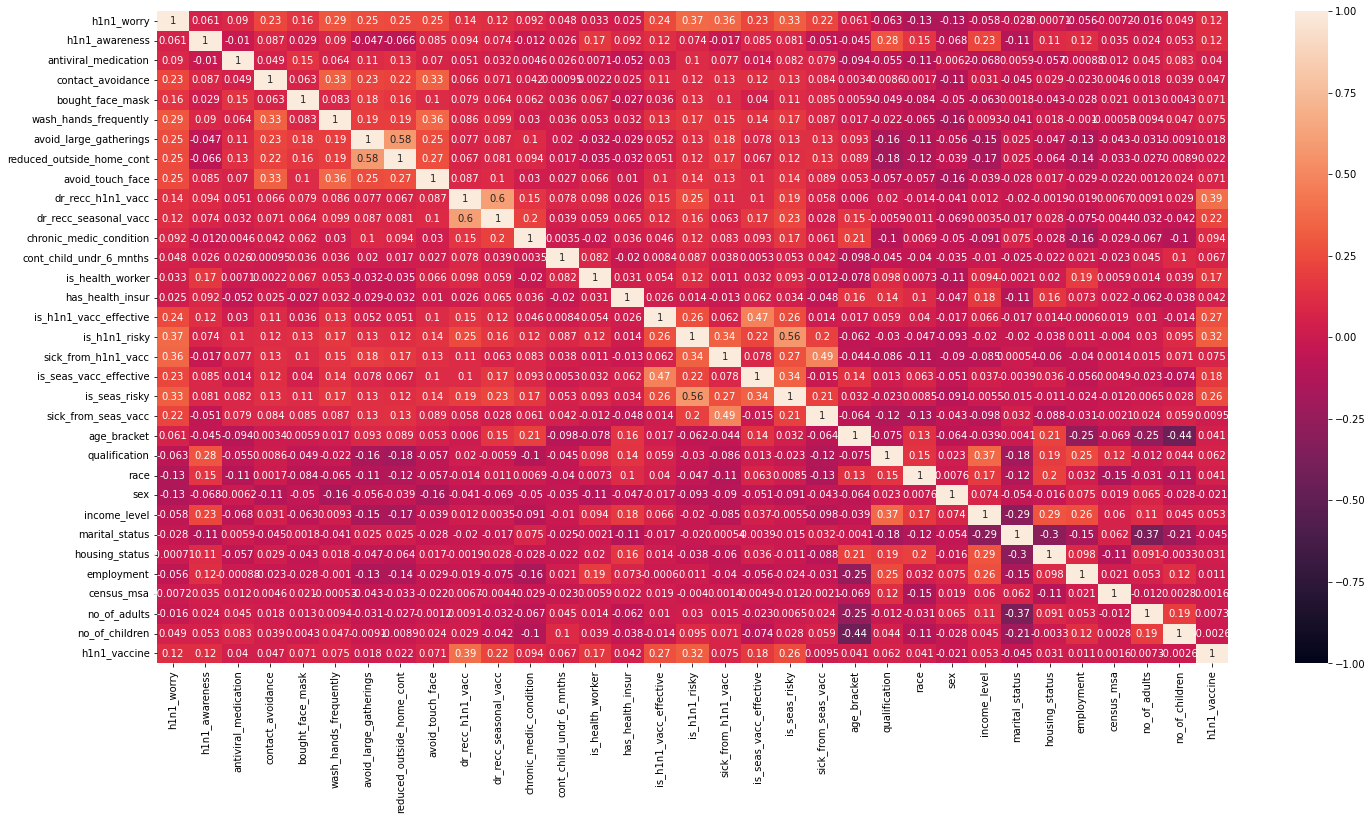

In [27]:
fig = plt.figure(figsize=(24,12))
sns.heatmap(vacc.corr(), annot= True, vmin = -1, vmax = 1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
vacc_train, vacc_test = train_test_split(vacc, test_size = 0.2)

In [25]:
vacc.shape

(26707, 33)

In [26]:
vacc_train.shape

(21365, 33)

In [27]:
vacc_test.shape

(5342, 33)

In [28]:
vacc_train_x  = vacc_train.iloc[: , 0:-1]
vacc_train_y  = vacc_train.iloc[: , -1]

vacc_test_x  = vacc_test.iloc[: , 0:-1]
vacc_test_y  = vacc_test.iloc[: , -1]

In [29]:
vacc_train_x.shape

(21365, 32)

In [30]:
vacc_train_y.shape

(21365,)

In [31]:
vacc_test_x.shape

(5342, 32)

In [32]:
vacc_test_y.shape

(5342,)

In [33]:
vacc_train_x.head(2)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children
8546,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,1,2,0,2,2,0,1.0,0.0
4152,2.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,3,3,0,2,0,2,2,2,1.0,1.0


In [34]:
vacc_train_y.head(2)

8546    0
4152    1
Name: h1n1_vaccine, dtype: int64

In [35]:
vacc.h1n1_vaccine.value_counts()   ## to check if there is class imbalance in y variable.

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [36]:
21033+5674

26707

In [37]:
5674/26707*100   ## 21% data of y-variable is class 1

21.24536638334519

In [38]:
21033/26707*100  ## 79% data of y-variable is class 0

78.75463361665481

In [39]:
78.75463361665481 + 21.24536638334519

100.0

In [40]:
26707*0.8

21365.600000000002

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
LOG = LogisticRegression()

In [42]:
LOG.fit(vacc_train_x , vacc_train_y)

C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
score_LOG = LOG.score(vacc_train_x , vacc_train_y)
score_LOG

0.8350573367657383

In [44]:
pred_test_y_LOG = LOG.predict(vacc_test_x)

In [45]:
pred_test_y_LOG

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
pred_test_y_LOG.shape

(5342,)

In [47]:
pd.Series(pred_test_y_LOG).value_counts()

0    4674
1     668
dtype: int64

In [48]:
vacc_test_y.value_counts()

0    4209
1    1133
Name: h1n1_vaccine, dtype: int64

In [49]:
pred_prob_test_y_LOG = LOG.predict_proba(vacc_test_x)  ## to see the predicted values of y in terms of probabilities.
pred_prob_test_y_LOG                                   

array([[0.95813774, 0.04186226],
       [0.3771261 , 0.6228739 ],
       [0.9799503 , 0.0200497 ],
       ...,
       [0.90117831, 0.09882169],
       [0.8374064 , 0.1625936 ],
       [0.94151297, 0.05848703]])

In [50]:
pred_prob_test_y_LOG.shape

(5342, 2)

In [51]:
pred_prob_test_y_LOG[: , 1]

array([0.04186226, 0.6228739 , 0.0200497 , ..., 0.09882169, 0.1625936 ,
       0.05848703])

In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [53]:
conmat_LOG = confusion_matrix(vacc_test_y, pred_test_y_LOG)
conmat_LOG

array([[4015,  194],
       [ 659,  474]], dtype=int64)

In [54]:
accuracy_LOG  = accuracy_score(vacc_test_y, pred_test_y_LOG)
precision_LOG = precision_score(vacc_test_y, pred_test_y_LOG)
recall_LOG    = recall_score(vacc_test_y, pred_test_y_LOG)
f1_LOG        = f1_score(vacc_test_y, pred_test_y_LOG)
roc_auc_LOG   = roc_auc_score(vacc_test_y, pred_test_y_LOG) 
print('score_LOG =' , score_LOG*100)
print('accuracy_LOG =' , accuracy_LOG*100)
print('precision_LOG =' , precision_LOG*100)
print('recall_LOG =' , recall_LOG*100)
print('f1_LOG =' , f1_LOG*100)
print('roc_auc_LOG =' , roc_auc_LOG*100)


score_LOG = 83.50573367657384
accuracy_LOG = 84.032197678772
precision_LOG = 70.95808383233533
recall_LOG = 41.83583406884378
f1_LOG = 52.637423653525815
roc_auc_LOG = 68.61333162220996


In [55]:
## plotting ROC Curve

fpr, tpr, threshold = roc_curve(vacc_test_y, pred_prob_test_y_LOG[: , 1])
fpr, tpr, threshold

(array([0.        , 0.        , 0.        , ..., 0.98645759, 0.98645759,
        1.        ]),
 array([0.00000000e+00, 8.82612533e-04, 9.70873786e-03, ...,
        9.99117387e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.96289377, 0.96289377, 0.91063116, ..., 0.00897919, 0.00896349,
        0.00298437]))

In [56]:
import matplotlib.pyplot as plt 

Text(0.6, 0.4, '68.61333162220996')

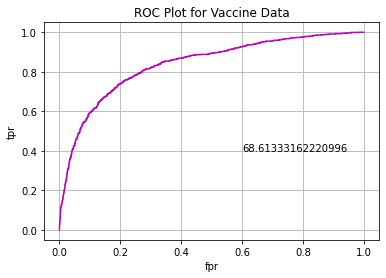

In [57]:
plt.plot (fpr, tpr, color = 'm') ; 
plt.xlabel ('fpr')                        
plt.ylabel ('tpr')
plt.title ('ROC Plot for Vaccine Data') 
plt.grid() 
plt.text(x=0.6, y=0.4, s=roc_auc_LOG*100)

# Logistic Regression with Tuning

In [58]:
LOG1 = LogisticRegression(class_weight='balanced')

In [59]:
LOG1.fit(vacc_train_x, vacc_train_y)

LogisticRegression(class_weight='balanced')

In [60]:
score_LOG1 = LOG1.score(vacc_train_x, vacc_train_y)
score_LOG1

0.7748186285981746

In [61]:
pred_test_y_LOG1 = LOG1.predict(vacc_test_x)
pred_test_y_LOG1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [62]:
pred_test_y_LOG1.shape

(5342,)

In [63]:
pd.Series(pred_test_y_LOG1).value_counts()

0    3666
1    1676
dtype: int64

In [64]:
vacc_test_y.value_counts()

0    4209
1    1133
Name: h1n1_vaccine, dtype: int64

In [65]:
pred_prob_test_y_LOG1 = LOG1.predict_proba(vacc_test_x)
pred_prob_test_y_LOG1

array([[0.86692137, 0.13307863],
       [0.15384227, 0.84615773],
       [0.93314786, 0.06685214],
       ...,
       [0.69070182, 0.30929818],
       [0.57501445, 0.42498555],
       [0.81499967, 0.18500033]])

In [66]:
pred_prob_test_y_LOG1.shape

(5342, 2)

In [67]:
conmat_LOG1 = confusion_matrix(vacc_test_y, pred_test_y_LOG1)  
conmat_LOG1

array([[3365,  844],
       [ 301,  832]], dtype=int64)

In [68]:
accuracy_LOG1  = accuracy_score(vacc_test_y, pred_test_y_LOG1)
precision_LOG1 = precision_score(vacc_test_y, pred_test_y_LOG1)
recall_LOG1    = recall_score(vacc_test_y, pred_test_y_LOG1)
f1_LOG1        = f1_score(vacc_test_y, pred_test_y_LOG1)
roc_auc_LOG1   = roc_auc_score(vacc_test_y, pred_test_y_LOG1) 

print('score_LOG1 =' , score_LOG1*100)
print('accuracy_LOG1 =' , accuracy_LOG1*100)
print('precision_LOG1 =' , precision_LOG1*100)
print('recall_LOG1 =' , recall_LOG1*100)
print('f1_LOG1 =' , f1_LOG1*100)
print('roc_auc_LOG1 =' , roc_auc_LOG1*100)


score_LOG1 = 77.48186285981747
accuracy_LOG1 = 78.56608011980532
precision_LOG1 = 49.64200477326969
recall_LOG1 = 73.43336275375111
f1_LOG1 = 59.23816304734781
roc_auc_LOG1 = 76.69054690312883


In [69]:
fpr1, tpr1, threshold1 = roc_curve(vacc_test_y, pred_prob_test_y_LOG1[: , 1])
fpr1, tpr1, threshold1

(array([0.        , 0.        , 0.        , ..., 0.98907104, 0.98907104,
        1.        ]),
 array([0.00000000e+00, 8.82612533e-04, 9.70873786e-03, ...,
        9.99117387e-01, 1.00000000e+00, 1.00000000e+00]),
 array([1.98948366, 0.98948366, 0.97330664, ..., 0.03194673, 0.03179814,
        0.01117416]))

Text(0.6, 0.4, '76.69054690312883')

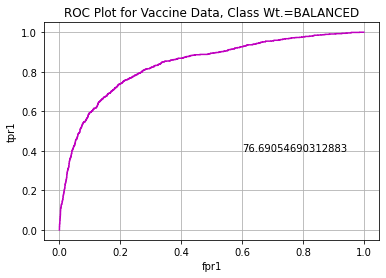

In [70]:
plt.plot (fpr, tpr, color = 'm') ; 
plt.xlabel ('fpr1')                        
plt.ylabel ('tpr1')
plt.title ('ROC Plot for Vaccine Data, Class Wt.=BALANCED') 
plt.grid() 
plt.text(x=0.6, y=0.4, s=roc_auc_LOG1*100)

# Decision Tree

In [71]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [72]:
DT.fit(vacc_train_x, vacc_train_y)

DecisionTreeClassifier()

In [73]:
score_DT = DT.score(vacc_train_x, vacc_train_y)
score_DT

0.9999063889538966

In [74]:
pred_test_y_DT = DT.predict(vacc_test_x)
pred_test_y_DT

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
conmat_DT = confusion_matrix(vacc_test_y, pred_test_y_DT)
conmat_DT

array([[3478,  731],
       [ 607,  526]], dtype=int64)

In [76]:
accuracy_DT  = accuracy_score(vacc_test_y, pred_test_y_DT)
precision_DT = precision_score(vacc_test_y, pred_test_y_DT)
recall_DT    = recall_score(vacc_test_y, pred_test_y_DT)
f1_DT        = f1_score(vacc_test_y, pred_test_y_DT)
roc_auc_DT   = roc_auc_score(vacc_test_y, pred_test_y_DT) 

print('score_DT =' , score_DT*100)
print('accuracy_DT =' , accuracy_DT*100)
print('precision_DT =' , precision_DT*100)
print('recall_DT =' , recall_DT*100)
print('f1_DT =' , f1_DT*100)
print('roc_auc_DT =' , roc_auc_DT*100)


score_DT = 99.99063889538967
accuracy_DT = 74.95320104829652
precision_DT = 41.84566428003182
recall_DT = 46.42541924095322
f1_DT = 44.01673640167364
roc_auc_DT = 64.52893675281209


In [77]:
DT.feature_importances_

array([0.04379509, 0.02635296, 0.00798319, 0.01696924, 0.01151556,
       0.01513568, 0.01891892, 0.02075232, 0.02475636, 0.15171821,
       0.01731493, 0.01910864, 0.01387259, 0.02081191, 0.00557924,
       0.0561224 , 0.05700029, 0.03998512, 0.03416054, 0.04052679,
       0.03635956, 0.04691362, 0.03677836, 0.02571645, 0.02442605,
       0.02496705, 0.01794602, 0.01533121, 0.02747295, 0.03785375,
       0.03286385, 0.03099113])

In [78]:
feat_imp_DT = pd.DataFrame({'Features' :vacc_train_x.columns , 'Imp' :DT.feature_importances_})
feat_imp_DT.sort_values('Imp', ascending = False)

,Features,Imp
9,dr_recc_h1n1_vacc,0.151718
16,is_h1n1_risky,0.057000
15,is_h1n1_vacc_effective,0.056122
21,age_bracket,0.046914
0,h1n1_worry,0.043795
19,is_seas_risky,0.040527
17,sick_from_h1n1_vacc,0.039985
29,census_msa,0.037854
22,qualification,0.036778
20,sick_from_seas_vacc,0.036360


In [79]:
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO

In [80]:
vacc_train_x.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children'],
      dtype='object')

In [81]:
vacc_train_x_names = vacc_train_x.columns 

# HyperParameter Tuning GRID SEARCH

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
search_dict = {'criterion' : ['entropy','gini'],
               'max_depth' : [4,5,6,7],
               'min_samples_split': [600, 800, 1000]}

In [84]:
from sklearn.tree import DecisionTreeClassifier
DT_GS = DecisionTreeClassifier() 

In [85]:
GRID = GridSearchCV(DT_GS, param_grid = search_dict)

In [86]:
GRID.fit(vacc_train_x, vacc_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [4, 5, 6, 7],
                         'min_samples_split': [600, 800, 1000]})

In [87]:
score_DT_GS = GRID.score(vacc_train_x, vacc_train_y)
score_DT_GS

0.827428036508308

In [88]:
GRID.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=1000)

In [89]:
pred_test_y_DT_GS = GRID.predict(vacc_test_x)
pred_test_y_DT_GS

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
pred_test_y_DT_GS.shape

(5342,)

In [91]:
conmat_DT_GS = confusion_matrix(vacc_test_y, pred_test_y_DT_GS) 
conmat_DT_GS

array([[3930,  279],
       [ 639,  494]], dtype=int64)

In [92]:
accuracy_DT_GS  = accuracy_score(vacc_test_y, pred_test_y_DT_GS)
precision_DT_GS = precision_score(vacc_test_y, pred_test_y_DT_GS)
recall_DT_GS    = recall_score(vacc_test_y, pred_test_y_DT_GS)
f1_DT_GS        = f1_score(vacc_test_y, pred_test_y_DT_GS)
roc_auc_DT_GS   = roc_auc_score(vacc_test_y, pred_test_y_DT_GS) 

print('score_DT_GS =' , score_DT_GS*100)
print('accuracy_DT_GS =' , accuracy_DT_GS*100)
print('precision_DT_GS =' , precision_DT_GS*100)
print('recall_DT_GS =' , recall_DT_GS*100)
print('f1_DT_GS =' , f1_DT_GS*100)
print('roc_auc_DT_GS =' , roc_auc_DT_GS*100)


score_DT_GS = 82.7428036508308
accuracy_DT_GS = 82.81542493448146
precision_DT_GS = 63.90685640362225
recall_DT_GS = 43.60105913503972
f1_DT_GS = 51.83630640083945
roc_auc_DT_GS = 68.48620312418416


# Decision Tree with tuning

In [94]:
DT1 = DecisionTreeClassifier(criterion='gini',max_depth = 5, min_samples_split = 1100)

In [95]:
DT1.fit(vacc_train_x, vacc_train_y)

DecisionTreeClassifier(max_depth=5, min_samples_split=1100)

In [96]:
score_DT1 = DT1.score(vacc_train_x, vacc_train_y)
score_DT1

0.8260706763398081

In [97]:
pred_test_y_DT1 = DT1.predict(vacc_test_x)
pred_test_y_DT1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [98]:
conmat_DT1 = confusion_matrix(vacc_test_y, pred_test_y_DT1)
conmat_DT1

array([[3903,  306],
       [ 599,  534]], dtype=int64)

In [101]:
DT1.feature_importances_

array([0.00974664, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.58234797,
       0.        , 0.        , 0.        , 0.05741808, 0.        ,
       0.15674806, 0.16427529, 0.        , 0.01096537, 0.        ,
       0.        , 0.        , 0.        , 0.01145372, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.00704487])

In [102]:
feat_imp_DT1 = pd.DataFrame({'Features' :vacc_train_x.columns , 'Imp' :DT1.feature_importances_})
feat_imp_DT1.sort_values('Imp', ascending = False)

,Features,Imp
9,dr_recc_h1n1_vacc,0.582348
16,is_h1n1_risky,0.164275
15,is_h1n1_vacc_effective,0.156748
13,is_health_worker,0.057418
23,race,0.011454
18,is_seas_vacc_effective,0.010965
0,h1n1_worry,0.009747
31,no_of_children,0.007045
20,sick_from_seas_vacc,0.000000
30,no_of_adults,0.000000


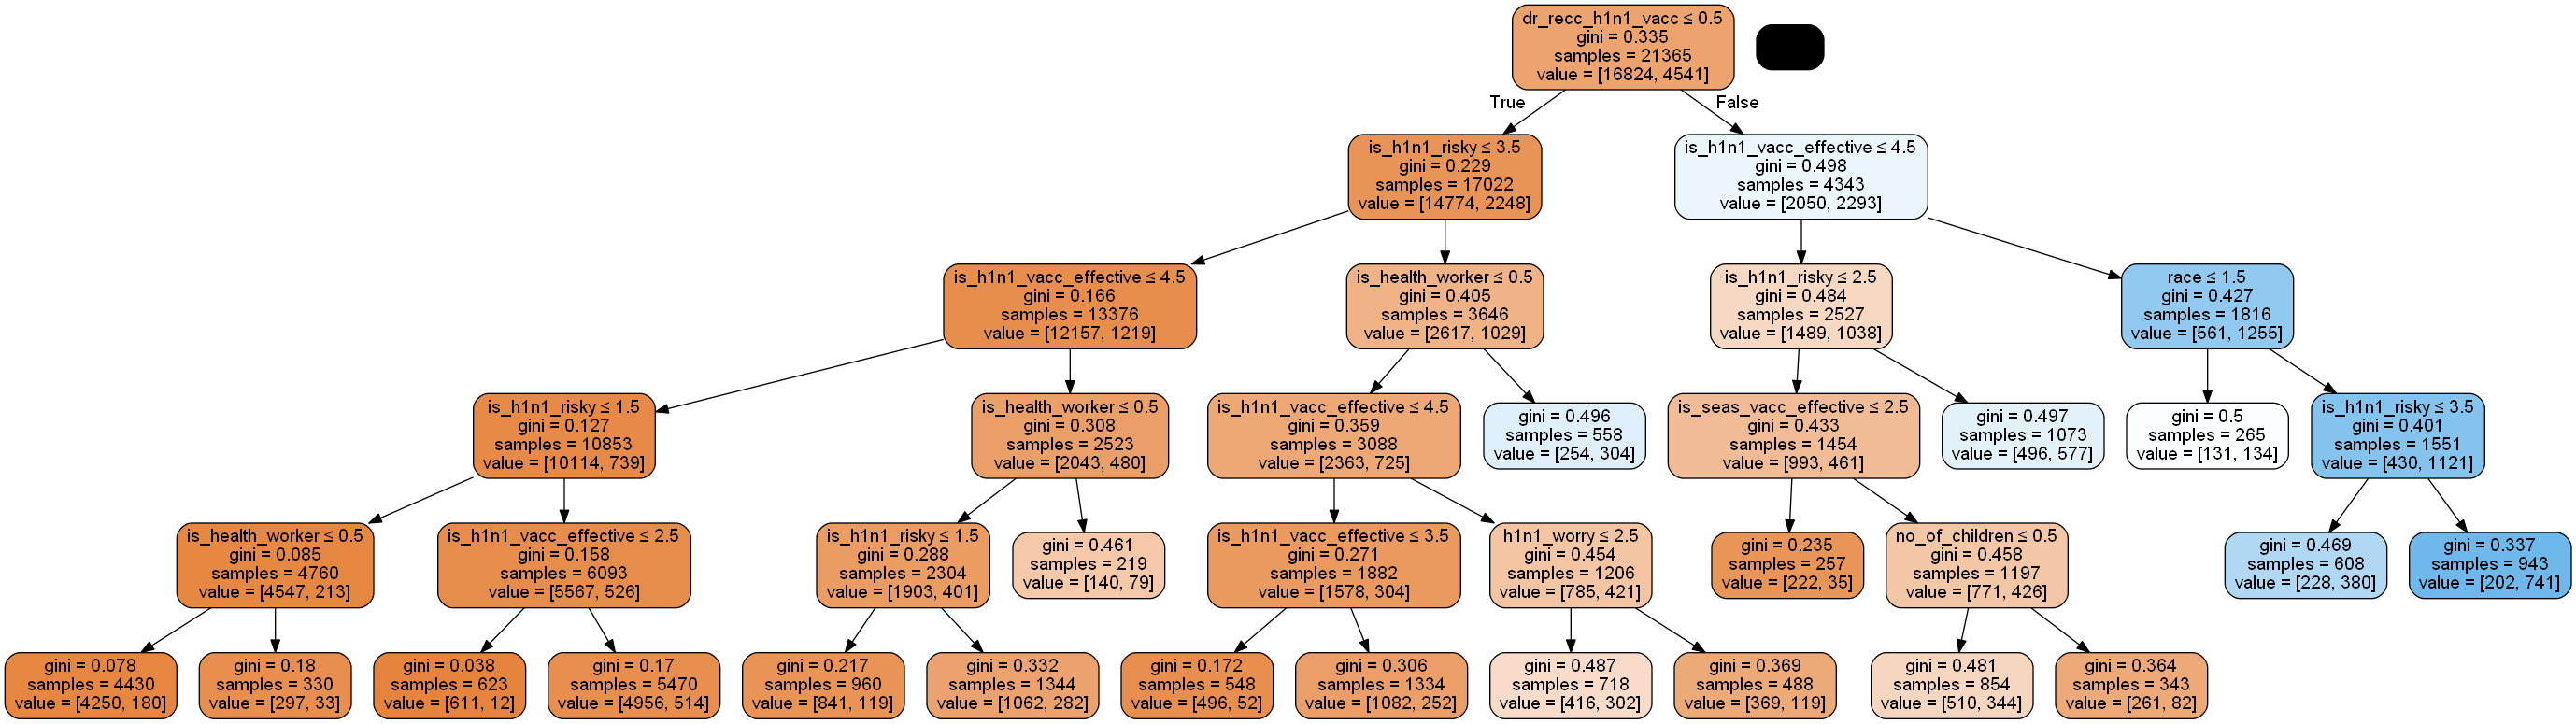

<Figure size 864x2160 with 0 Axes>

In [103]:
dot_data = StringIO()  
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,30))

export_graphviz(DT1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=vacc_train_x_names)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())   

# DT2

In [104]:
DT2 = DecisionTreeClassifier(criterion='entropy',max_depth = 7, min_samples_split = 600, class_weight='balanced') 

In [105]:
DT2.fit(vacc_train_x, vacc_train_y)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, min_samples_split=600)

In [106]:
score_DT2 = DT2.score(vacc_train_x, vacc_train_y)
score_DT2

0.77088696466183

In [107]:
pred_test_y_DT2 = DT2.predict(vacc_test_x)
pred_test_y_DT2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [108]:
pred_test_y_DT2.shape

(5342,)

In [109]:
pd.Series(pred_test_y_DT2).value_counts()

0    3638
1    1704
dtype: int64

In [110]:
conmat_DT2 = confusion_matrix(vacc_test_y, pred_test_y_DT2)
conmat_DT2

array([[3329,  880],
       [ 309,  824]], dtype=int64)

In [111]:
accuracy_DT2  = accuracy_score(vacc_test_y, pred_test_y_DT2)
precision_DT2 = precision_score(vacc_test_y, pred_test_y_DT2)
recall_DT2    = recall_score(vacc_test_y, pred_test_y_DT2)
f1_DT2        = f1_score(vacc_test_y, pred_test_y_DT2)
roc_auc_DT2   = roc_auc_score(vacc_test_y, pred_test_y_DT2) 

print('score_DT2 =' , score_DT2*100)
print('accuracy_DT2 =' , accuracy_DT2*100)
print('precision_DT2 =' , precision_DT2*100)
print('recall_DT2 =' , recall_DT2*100)
print('f1_DT2 =' , f1_DT2*100)
print('roc_auc_DT2 =' , roc_auc_DT2*100)


score_DT2 = 77.08869646618301
accuracy_DT2 = 77.74241856982404
precision_DT2 = 48.35680751173709
recall_DT2 = 72.72727272727273
f1_DT2 = 58.08953119492421
roc_auc_DT2 = 75.90984686494309


In [112]:
DT2.feature_importances_

array([0.0053641 , 0.00153898, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00318011, 0.49282013,
       0.00572419, 0.        , 0.        , 0.04201562, 0.        ,
       0.16757523, 0.21944336, 0.00484077, 0.00945562, 0.01172725,
       0.0078508 , 0.00775167, 0.        , 0.01254868, 0.00187145,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.00153346, 0.00475858])

In [113]:
feat_imp_DT2 = pd.DataFrame({'Features' :vacc_train_x.columns , 'Imp' :DT2.feature_importances_})
feat_imp_DT2.sort_values('Imp', ascending = False)

,Features,Imp
9,dr_recc_h1n1_vacc,0.492820
16,is_h1n1_risky,0.219443
15,is_h1n1_vacc_effective,0.167575
13,is_health_worker,0.042016
23,race,0.012549
19,is_seas_risky,0.011727
18,is_seas_vacc_effective,0.009456
20,sick_from_seas_vacc,0.007851
21,age_bracket,0.007752
10,dr_recc_seasonal_vacc,0.005724


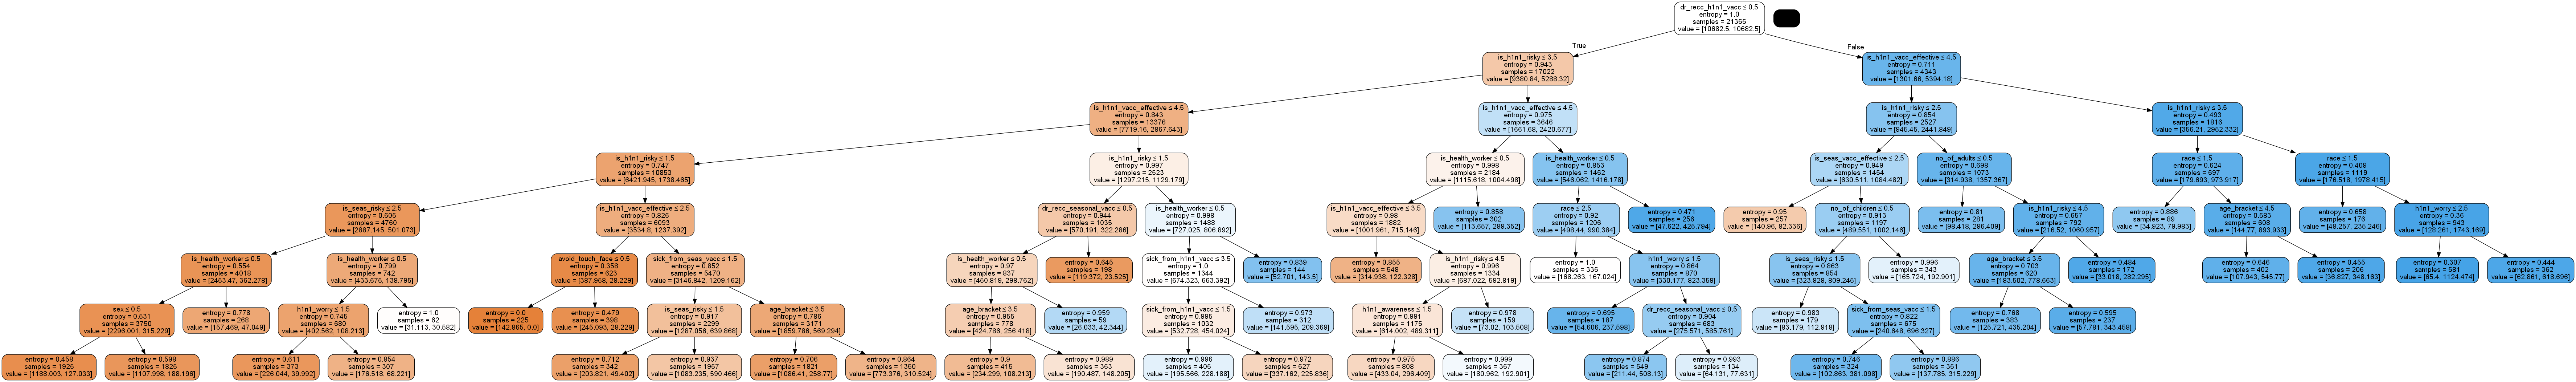

<Figure size 864x2880 with 0 Axes>

In [114]:
dot_data = StringIO() 
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,40))

export_graphviz(DT2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=vacc_train_x_names)
(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

# Random Forest

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
RF = RandomForestClassifier(n_estimators=150, class_weight='balanced')  

In [117]:
RF.fit(vacc_train_x, vacc_train_y)

RandomForestClassifier(class_weight='balanced', n_estimators=150)

In [118]:
score_RF = RF.score(vacc_train_x, vacc_train_y)
score_RF

0.9998595834308448

In [119]:
pred_test_y_RF = RF.predict(vacc_test_x)
pred_test_y_RF

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [120]:
pred_test_y_RF.shape

(5342,)

In [121]:
pd.Series(pred_test_y_RF).value_counts()

0    4722
1     620
dtype: int64

In [122]:
conmat_RF = confusion_matrix(vacc_test_y, pred_test_y_RF)
conmat_RF

array([[4029,  180],
       [ 693,  440]], dtype=int64)

In [123]:
accuracy_RF  = accuracy_score(vacc_test_y, pred_test_y_RF)
precision_RF = precision_score(vacc_test_y, pred_test_y_RF)
recall_RF    = recall_score(vacc_test_y, pred_test_y_RF)
f1_RF        = f1_score(vacc_test_y, pred_test_y_RF)
roc_auc_RF   = roc_auc_score(vacc_test_y, pred_test_y_RF) 

print('score_RF =' , score_RF*100)
print('accuracy_RF =' , accuracy_RF*100)
print('precision_RF =' , precision_RF*100)
print('recall_RF =' , recall_RF*100)
print('f1_RF =' , f1_RF*100)
print('roc_auc_RF =' , roc_auc_RF*100)


score_RF = 99.98595834308448
accuracy_RF = 83.65780606514413
precision_RF = 70.96774193548387
recall_RF = 38.83495145631068
f1_RF = 50.199657729606386
roc_auc_RF = 67.27920060342262


In [124]:
RF.feature_importances_

array([0.03828198, 0.02894115, 0.00790369, 0.01714011, 0.00950226,
       0.01250435, 0.01836433, 0.01829399, 0.01837798, 0.10770244,
       0.02731399, 0.01802686, 0.01002089, 0.02065122, 0.00653394,
       0.07618616, 0.08278723, 0.03804239, 0.03871791, 0.05589347,
       0.03674938, 0.04788872, 0.03803704, 0.02371803, 0.02201995,
       0.02541964, 0.01812416, 0.01510542, 0.02481329, 0.03615168,
       0.03253289, 0.02825348])

In [125]:
feat_imp_RF = pd.DataFrame({'Features' : vacc_train_x.columns , 'Importance' : RF.feature_importances_})
feat_imp_RF = feat_imp_RF.sort_values('Importance' , ascending=False)
feat_imp_RF

,Features,Importance
9,dr_recc_h1n1_vacc,0.107702
16,is_h1n1_risky,0.082787
15,is_h1n1_vacc_effective,0.076186
19,is_seas_risky,0.055893
21,age_bracket,0.047889
18,is_seas_vacc_effective,0.038718
0,h1n1_worry,0.038282
17,sick_from_h1n1_vacc,0.038042
22,qualification,0.038037
20,sick_from_seas_vacc,0.036749


# KNN

In [126]:
from sklearn.neighbors import KNeighborsClassifier

In [127]:
KNN = KNeighborsClassifier(n_neighbors=10)

In [128]:
KNN.fit(vacc_train_x, vacc_train_y)

KNeighborsClassifier(n_neighbors=10)

In [129]:
score_KNN = KNN.score(vacc_train_x, vacc_train_y)
score_KNN

0.8322958109056868

In [130]:
pred_test_y_KNN = KNN.predict(vacc_test_x)
pred_test_y_KNN

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [131]:
pred_test_y_KNN.shape

(5342,)

In [132]:
pd.Series(pred_test_y_KNN).value_counts()

0    4912
1     430
dtype: int64

In [133]:
conmat_KNN = confusion_matrix(vacc_test_y, pred_test_y_KNN)
conmat_KNN

array([[4094,  115],
       [ 818,  315]], dtype=int64)

In [134]:
accuracy_KNN  = accuracy_score(vacc_test_y, pred_test_y_KNN)
precision_KNN = precision_score(vacc_test_y, pred_test_y_KNN)
recall_KNN    = recall_score(vacc_test_y, pred_test_y_KNN)
f1_KNN        = f1_score(vacc_test_y, pred_test_y_KNN)
roc_auc_KNN   = roc_auc_score(vacc_test_y, pred_test_y_KNN) 

print('score_KNN =' , score_KNN*100)
print('accuracy_KNN =' , accuracy_KNN*100)
print('precision_KNN =' , precision_KNN*100)
print('recall_KNN =' , recall_KNN*100)
print('f1_KNN =' , f1_KNN*100)
print('roc_auc_KNN =' , roc_auc_KNN*100)


score_KNN = 83.22958109056869
accuracy_KNN = 82.53463122426058
precision_KNN = 73.25581395348837
recall_KNN = 27.802294792586054
f1_KNN = 40.30710172744721
roc_auc_KNN = 62.535027177713786


# KNN - TradeOff

In [135]:
l1 = []
for k in range(1, 51):
    KNN_TO = KNeighborsClassifier( n_neighbors = k)
    KNN_TO.fit(vacc_train_x  , vacc_train_y)
    pred_test_y_KNN_TO = KNN_TO.predict(vacc_test_x)
    conmat_KNN_TO = confusion_matrix(vacc_test_y , pred_test_y_KNN_TO)
    acc = conmat_KNN_TO.diagonal().sum()  / conmat_KNN_TO.sum()
    l1.append(acc)

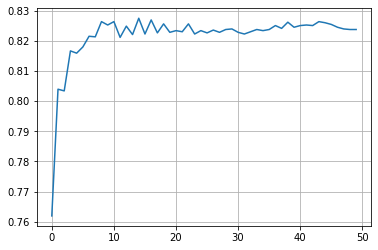

In [136]:
plt.plot(l1)
plt.grid()